# Pregunta 1. Modelos Lineales Python 
### Grupo 2
### Estudiantes:
#### Enrique Ríos
#### Angie Quispe
#### Amalia
#### Fabio Salas

In [19]:
# Primero se procede a importar los packages


import pandas as pd
import numpy as np
import re

# Los Plots de las librerías

import matplotlib.pyplot as plt
import seaborn as sns

# Se importa linear models library

import statsmodels.api as sm   # linear regression utiliza todas las columnas de base de datos 
import statsmodels.formula.api as smf  # linear regression usa una formula

# Exportar la tabla en Latex

!pip install pystout
from pystout import pystout


user = os.getlogin()   # Username
os.chdir(f"/Users/enriquerios/Desktop/PUCP 2022.2/R y Python/Trabajo Final (2.0)/") # Set directorio


NameError: name 'os' is not defined

In [4]:
# Se procede a instalar statsmodels
!pip install statsmodels

In [5]:
# Se procede a leer la data del paper Economic Shocks and Civil Conflict en formato dta.

data = pd.read_stata("/Users/enriquerios/Desktop/PUCP 2022.2/R y Python/Trabajo Final (2.0)/mss_repdata.dta",
                     convert_categoricals=False)

# convert_categoricals=False: No se lee las etiquetas de valor 

In [8]:
data

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552.0,1995-01-01,Zimbabwe,ZWE,493.448456,465.000092,680.722412,0.061179,-0.316902,0.513642,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
739,552.0,1996-01-01,Zimbabwe,ZWE,746.904236,493.448456,465.000092,0.513642,0.061179,0.044380,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
740,552.0,1997-01-01,Zimbabwe,ZWE,780.051941,746.904236,493.448456,0.044380,0.513642,-0.181482,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
741,552.0,1998-01-01,Zimbabwe,ZWE,638.486389,780.051941,746.904236,-0.181482,0.044380,0.094420,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0


In [9]:
# Se procede a describir la tabla y el tipo de variables

data.describe()

data.info()

data.dtypes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 742
Columns: 200 entries, ccode to soc
dtypes: datetime64[ns](1), float32(104), float64(78), int32(9), int8(5), object(3)
memory usage: 813.4+ KB


ccode                  float64
year            datetime64[ns]
country_name            object
country_code            object
GPCP                   float32
                     ...      
fh_pol                 float64
S                      float32
W                      float32
WoverS                 float32
soc                    float32
Length: 200, dtype: object

In [11]:
# Para ello las variables de interés son las siguientes
# NDVI_g es la Tasa de variación del índice de vegetación
# tot_100 son los Términos de intercambio
# trade_pGDP son el Porcentaje de las exportaciones respecto del PBI
# land_crop es el Porcentaje de tierra cultivable en uso
# va_agr es el Valor agregado del sector agrícola respecto del PBI
# va_ind_manf es el Valor agregado del sector manufacturero al PBI


# Seleccionamos las variables para las estadísticas descriptivas
table1 = data.loc[:,["NDVI_g", "tot_100", "trade_pGDP",
                     "land_crop", "va_agr", "va_ind_manf"]]

table1 

# selccionamos los estadísticos de interés: media, error estándar y cantidad de observaciones

summary_table = table1.describe().loc[["mean","std","count"]]
summary_table


,NDVI_g,tot_100,trade_pGDP,land_crop,va_agr,va_ind_manf
mean,0.009282,109.877568,64.252421,1.979464,32.181401,11.117373
std,0.093208,34.684560,34.291007,3.373026,15.166560,6.262198
count,646.000000,668.000000,698.000000,701.000000,702.000000,669.000000


In [12]:
# Ahora se procede a presentar la tabla de forma transpuesta
summary_table = table1.describe().loc[["mean","std","count"]].T  # .t permite tranponer el DataFrame

summary_table


,mean,std,count
NDVI_g,0.009282,0.093208,646.0
tot_100,109.877568,34.684560,668.0
trade_pGDP,64.252421,34.291007,698.0
land_crop,1.979464,3.373026,701.0
va_agr,32.181401,15.166560,702.0
va_ind_manf,11.117373,6.262198,669.0


In [13]:

table1.columns

Index(['NDVI_g', 'tot_100', 'trade_pGDP', 'land_crop', 'va_agr',
       'va_ind_manf'],
      dtype='object')

In [14]:
table1.columns

new_names = ["Tasa de variación del índice de vegetación",
"Términos de intercambio",  
"Porcentaje de las exportaciones respecto del PBI",
"Porcentaje de tierra cultivable en uso",
"Valor agregado del sector agrícola respecto del PBI",
"Valor agregado del sector manufacturero al PBI"]


In [15]:
# Se procede a unir las listas bajo la estructura diccionario

dict( zip( table1.columns, new_names) )


{'NDVI_g': 'Tasa de variación del índice de vegetación',
 'tot_100': 'Términos de intercambio',
 'trade_pGDP': 'Porcentaje de las exportaciones respecto del PBI',
 'land_crop': 'Porcentaje de tierra cultivable en uso',
 'va_agr': 'Valor agregado del sector agrícola respecto del PBI',
 'va_ind_manf': 'Valor agregado del sector manufacturero al PBI'}

In [16]:
# Ahora se personaliza el resumen de la tabla

index_nuevos_nombres = dict( zip( table1.columns, new_names) )

columns_nuevos_nombres = {
    "mean": "Mean",
    "std": "Standard Deviation",
    "count": "Observations",
}

# Rename rows (indexes) and columns
summary_table.rename(index=index_nuevos_nombres, columns=columns_nuevos_nombres, inplace=True)

In [17]:
summary_table

,Mean,Standard Deviation,Observations
Tasa de variación del índice de vegetación,0.009282,0.093208,646.0
Términos de intercambio,109.877568,34.684560,668.0
Porcentaje de las exportaciones respecto del PBI,64.252421,34.291007,698.0
Porcentaje de tierra cultivable en uso,1.979464,3.373026,701.0
Valor agregado del sector agrícola respecto del PBI,32.181401,15.166560,702.0
Valor agregado del sector manufacturero al PBI,11.117373,6.262198,669.0


## Exportar Tabla en LaTex 

In [1]:
# Luego se procede a exportar la tabla en formato Latex
# \ permite escribir el código extenso en lineas diferentes

summary_table.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2).format(subset="Observations", precision=0).to_latex( "summary1.tex", caption="Descriptive Statistics", column_format = "lccc"   # l: left, c:center ,) 


#Columns format

summary_table.style.format(subset="Mean", precision=2).format(subset="Standard Deviation", precision=2).format(subset="Observations", precision=0)


SyntaxError: invalid syntax (<ipython-input-1-837ee459e0a7>, line 9)

## Ahora se procede a Replicar la Tabla 3 del Paper Miguel et al (2004)

In [3]:
import pandas as pd
import numpy as np

#plots library

import matplotlib.pyplot as plt
import seaborn as sns

# import linear models library

import statsmodels.api as sm
import statsmodels.formula.api as smf

!pip install statsmodels

data = pd.read_stata("/Users/enriquerios/Desktop/PUCP 2022.2/R y Python/Trabajo Final (2.0)/mss_repdata.dta",)


In [4]:
data

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552.0,1995-01-01,Zimbabwe,ZWE,493.448456,465.000092,680.722412,0.061179,-0.316902,0.513642,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
739,552.0,1996-01-01,Zimbabwe,ZWE,746.904236,493.448456,465.000092,0.513642,0.061179,0.044380,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
740,552.0,1997-01-01,Zimbabwe,ZWE,780.051941,746.904236,493.448456,0.044380,0.513642,-0.181482,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
741,552.0,1998-01-01,Zimbabwe,ZWE,638.486389,780.051941,746.904236,-0.181482,0.044380,0.094420,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0


In [6]:
# Dummy por país para efectos fijos que nos servira más adelante

data['Dummy'] =  np.where(data['ccode'] > 0 , 1, 0)

smf.ols('ccode ~ Dummy', data).fit(cov_type = 'HC1')  # HC0: white , HC1: Hubert - White 
model1 = smf.ols('ccode ~ Dummy', data).fit(cov_type = 'HC1').summary()
print(model1)
            

                            OLS Regression Results                            
Dep. Variable:                  ccode   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                 6.254e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:29:32   Log-Likelihood:                -4018.6
No. Observations:                 743   AIC:                             8039.
Df Residuals:                     742   BIC:                             8044.
Df Model:                           0                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    248.0451      0.992    250.075      0.0

In [7]:

smf.ols('ccode ~ Dummy', data).fit(cov_type = 'HC1').summary2().tables[1]


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,248.045087,0.991884,250.074757,0.0,246.101031,249.989144
Dummy,248.045087,0.991884,250.074757,0.0,246.101031,249.989144


In [9]:
# Primer Modelo
# Se procede a replicar la tabla considerando dos modelos. MODEL 1
# GPCP_g es la Tasa de Variación de las lluvias en el periodo t
# GPCP_g_l es la Tasa de Variación de las lluvias en el periodo t-1
# El primer modelo considera la variable de interés: any_prio // Variable Explicativa: GPCP_g


model1 = smf.ols( 'ccode ~ Dummy + any_prio + GPCP_g ', data).fit(cov_type = 'HC1').summary2().tables[1]
model1_coef = model1.iloc[1,0]  # fila posición 1 y columan posición 0
model1_coef_se = model1.iloc[1,1] # fila posición 1 y columan posición 1

# HC1: standar error robust aginst heterocedasticity

model1_lower = model1.iloc[1,4]
model1_upper = model1.iloc[1,5]


In [12]:
#Segundo Modelo
# Mientras que en el segundo modelo se considera la variable de interés:  war_prio // Variable Explicativa: GPCP_g_l
# Se muestra efectos fijos (country), Si country-time trends MODEL 2
# Se inclue a la tasa de variación de las lluvias del año siguiente (GPCP_g_fl)
# Errores estandar robustas (Huber-White robust)
# Termino de perturbación están clusterizados (agrupados) a nivel país


model2 = smf.ols('ccode ~ Dummy + war_prio + GPCP_g_l' , data).fit(cov_type = 'HC1').summary2().tables[1]
model2_coef = model2.iloc[1,0]
model2_coef_se = model2.iloc[1,1]

model2_lower = model2.iloc[1,4]
model2_upper = model2.iloc[1,5]


KeyError: 'Model'

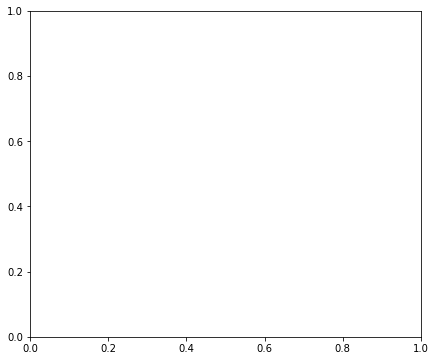

In [26]:
# CoefPlot
fig, ax = plt.subplots(figsize=(7, 6))

ax.scatter(x=table_pandas['Model'], 
         marker='o', s=20,  # s: modificar tamaño del point
         y=table_pandas['Estimate'], color = "black")

eb1 = plt.errorbar(x=table_pandas['Model'], y=table_pandas['Estimate'],
            yerr = 0.5*(table_pandas['Upper_bound']- table_pandas['Lower_bound']),
            color = 'black', ls='', capsize = 4)

# ls='': no une los puntos rojos 
#  yerr genera el gráfico del intervalo de confianza 

plt.axhline(y=0, color = 'black').set_linestyle('--')  # linea horizontal 
# Set title & labels
plt.title('Smoking Coefficient (95% CI)',fontsize=12)



In [ ]:
# Si el  sm function  es (homocedasdico)

ols_model = sm.OLS(y, X).fit()

ols_model.summary().tables[0]

ols_model.summary().tables[1]


ols_model.summary().tables[2]

print(ols_model.summary())

In [ ]:
control_formula = "any_prio ~ GPCP_g + GPCP_g_l"

ols_model = smf.ols(control_formula, data=data).fit()

print(ols_model.summary())




In [ ]:
# Modelo con Efectos Fijos
# Si efectos fijos (country), Si country-time trends
# errores estandar robustos (Huber-White robust)
# termino de perturbación están clusterizados (agrupados) a nivel país
# No se añade variables de control

formula_model1 = "any_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )

ols_model1 = smf.ols(formula_model1, data=data).fit(cov_type='cluster', cov_kwds={'groups': data['ccode']})

print(ols_model1.summary())

rmse_ol1 = round(mean_squared_error( y, ols_model1.predict())**0.5,2)

print(rmse_ol1)

# Model OLS:
Si efectos fijos (country), Si country-time trends
Se inclue a la tasa de variación de las lluvias del año siguiente (GPCP_g_fl)
errores estandar robustas (Huber-White robust)
termino de perturbación están clusterizados (agrupados) a nivel país

formula_model2 = "war_prio ~ GPCP_g + GPCP_g_l + GPCP_g_fl + C(ccode)" + ' + ' + ' + '.join( country_trend )

ols_model2 = smf.ols(formula_model2, data=data).fit(cov_type='cluster', cov_kwds={'groups': data['ccode']})

print(ols_model2.summary())

rmse_ol2 = round(mean_squared_error( y, ols_model2.predict())**0.5,2)

print(rmse_ol2)



# En caso que quisieramos eliminar los terminos de perturbación, debemos borrar los missing presenten en algunas de nuestras variables
# En este caso tot_100_g presente missings. Por ello, primero borramos los missings  de esa columna. 

data_na = data.dropna(subset = 'tot_100_g')

formula_model3 = "war_prio ~ GPCP_g + GPCP_g_l + tot_100_g + C(ccode)" + ' + ' + ' + '.join( country_trend )

ols_model3 = smf.ols(formula_model3, data=data_na).fit(cov_type='cluster', cov_kwds={'groups': data_na['ccode']})

print(ols_model3.summary())

y_na = data_na['gdp_g'] # Es el Nuevo vector de la variable Y

rmse_ol3 = round(mean_squared_error( y_na, ols_model3.predict())**0.5,2)

print(rmse_ol3)










## Exportar Tabla 3 

In [ ]:
# Lista de explicativa a mostrarse en la tabla

explicativas = ['GPCP_g','GPCP_g_l','GPCP_g_fl','tot_100_g','y_0', 
                'polity2l', 'ethfrac', 'relfrac', 'Oil', 'lmtnest','lpopl1']

# etiquetas a las variables 

etiquetas = ['Growth in rainfall, t','Growth in rainfall, t-1']


labels = dict(zip(explicativas,etiquetas))
labels 


pystout(models = [ols_model1,ols_model2,], file='regression_table_2.tex', digits=3,
        endog_names=['OLS','OLS','OLS'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        mgroups={'Dependent Variable: Civil Conflict 25 Deaths':[1,5]}, # titulo a las regresiones
        modstat={'nobs':'Observarions','rsquared':'R\sym{2}'}, # estadísticos 
        addrows={'Country fixed effects':['yes','yes','yes'], 'Country-specific time trends' :
                 ['yes','yes','yes'],
                 'Root mean square error': [rmse_ol1,rmse_ol2,rmse_ol3]}, # añadimos filas 
        addnotes=['Note.—Huber robust standard errors are in parentheses.',
                  'Regression disturbance terms are clustered at the country level.',
                 'A country-specific year time trend is included in all specifications (coefficient estimates not reported).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Rainfall and Civil Conflict (Reduced-Form)',
        stars={.1:'*',.05:'**',.01:'***'}
       )

## Graficar Coeft  Plot del Coeficiente Estimado de GPCP_g

In [8]:
#Se instalan los packages necesarios
import pandas as pd
import numpy as np

#plots library

import matplotlib.pyplot as plt
import seaborn as sns

# import linear models library

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
# Se instala statsmodels
!pip install statsmodels



In [10]:
# Se procede a leer la data del paper Economic Shocks and Civil Conflict en formato dta.

data = pd.read_stata("/Users/enriquerios/Desktop/PUCP 2022.2/R y Python/Trabajo Final (2.0)/mss_repdata.dta",
                     convert_categoricals=False)

# convert_categoricals=False: No se lee las etiquetas de valor 

In [11]:
data

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552.0,1995-01-01,Zimbabwe,ZWE,493.448456,465.000092,680.722412,0.061179,-0.316902,0.513642,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
739,552.0,1996-01-01,Zimbabwe,ZWE,746.904236,493.448456,465.000092,0.513642,0.061179,0.044380,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
740,552.0,1997-01-01,Zimbabwe,ZWE,780.051941,746.904236,493.448456,0.044380,0.513642,-0.181482,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
741,552.0,1998-01-01,Zimbabwe,ZWE,638.486389,780.051941,746.904236,-0.181482,0.044380,0.094420,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0


In [ ]:
# First Model

model1 = smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1').summary2().tables[1]
model1_coef = model1.iloc[1,0]  # fila posición 1 y columan posición 0
model1_coef_se = model1.iloc[1,1] # fila posición 1 y columan posición 1

# HC1: standar error robust aginst heterocedasticity

model1_lower = model1.iloc[1,4]
model1_upper = model1.iloc[1,5]


# Second Model

model2 = smf.ols('lbwght ~ Dummy + motheduc', data).fit(cov_type = 'HC1').summary2().tables[1]
model2_coef = model2.iloc[1,0]
model2_coef_se = model2.iloc[1,1]

model2_lower = model2.iloc[1,4]
model2_upper = model2.iloc[1,5]


able = np.zeros( ( 3, 4 ) )

table[0,0] = model1_coef
table[0,1] = model1_coef_se 
table[0,2] = model1_lower
table[0,3] = model1_upper 

table[1,0] = model2_coef
table[1,1] = model2_coef_se  
table[1,2] = model2_lower
table[1,3] = model2_upper 

table[2,0] = model3_coef
table[2,1] = model3_coef_se  
table[2,2] = model3_lower
table[2,3] = model3_upper 

table_pandas = pd.DataFrame( table, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])
table_pandas.index = [ "OLS baseline","OLS with controls", "OLS interactive model"]

table_pandas.reset_index(inplace = True)
table_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table_pandas.round(8)




fig, ax = plt.subplots(figsize=(7, 6))

ax.scatter(x=table_pandas['Model'], 
         marker='o', s=20,  # s: modificar tamaño del point
         y=table_pandas['Estimate'], color = "black")

eb1 = plt.errorbar(x=table_pandas['Model'], y=table_pandas['Estimate'],
            yerr = 0.5*(table_pandas['Upper_bound']- table_pandas['Lower_bound']),
            color = 'black', ls='', capsize = 4)

# ls='': no une los puntos rojos 
#  yerr genera el gráfico del intervalo de confianza 

plt.axhline(y=0, color = 'black').set_linestyle('--')  # linea horizontal 
# Set title & labels
plt.title('Smoking Coefficient (95% CI)',fontsize=12)

